<a href="https://colab.research.google.com/github/GabrielJHA17/Prog_Agro_2025_2/blob/main/Tarea_Individual_SecadorSolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Sucre
## Facultad de Ingeniería
### Programa de Ingeniería Agroindustrial

Asignatura: Programación de Computadoras con Python

Actividad: Evaluación del Desempeño de un Secador Solar

Docente:
Justo Fuentes Cuello

Estudiantes:

Gabriel Herazo. 1005647085



*Fecha:* 16/11/2025

 **Estructura general**
 <a name="contenido"></a>
# Evaluación del Desempeño de un Secador Solar
## Contenido
- [1. Introducción](#introduccion)
- [2. Datos del problema](#datos)
- [3. Fundamento teórico](#teoria)
- [4. Cálculos paso a paso](#calculos)
- [5. Resultados y conclusiones](#resultados)
- [6. Visualización](#graficos)
- [7. Prompts sugeridos](#prompts)


<a name="introduccion"></a>
1. **Introducción**



Para esta actividad mi grupo ha seleccionado un secador solar forzado. En este diseño, el aire se hace pasar por un colector solar y luego atraviesa la cámara de secado impulsado por un ventilador (flujo de aire forzado).
Motivos de la elección:

*   Mejor control del flujo de aire y, por tanto, del tiempo y uniformidad del secado.
*   Más reproducible en ensayos y más sencillo de instrumentar (caudalímetro, anemómetro, control del ventilador).
*   Menor dependencia de las condiciones de viento locales y mayor capacidad de escalado.

Objetivo del documento: presentar los datos del problema, fundamentar teóricamente las fórmulas empleadas, describir paso a paso los cálculos, mostrar cómo interpretar resultados y ofrecer los prompts sugeridos para consultas a ChatGPT/Gemini.

<a name="datos"></a>

2. **Datos del problema**

In [ ]:
# Datos base para el Grupo (valores por defecto; modificables ±10%)
A = 3.0            # Área del colector, m2
m_dot = 0.030      # Flujo másico de aire, kg/s
Ti = 33.0          # Temperatura de entrada (al colector o cámara), °C
To = 48.0          # Temperatura de salida (del colector), °C
I = 820.0          # Irradiancia (intensidad solar), W/m2
m_p = 5.5          # Masa del producto a secar, kg
omega_i = 24.0     # Humedad inicial (%)
omega_f = 10.0     # Humedad final deseada (%)

<a name="teoria"></a>
3. **Fundamento teórico**

In [ ]:
# Parámetros
m_dot = 0.05           # flujo másico de aire (kg/s)
c_p = 1005             # calor específico del aire (J/kg·°C)
T_o = 50               # temperatura de salida del colector (°C)
T_i = 30               # temperatura de entrada del colector (°C)
A = 2.0                # área del colector solar (m²)
I = 800                # irradiancia solar incidente (W/m²)

# Cálculo de eficiencia térmica
eta_c = (m_dot * c_p * (T_o - T_i)) / (A * I)
print(f"Eficiencia térmica del colector solar: {eta_c:.4f} o {eta_c*100:.2f}%")

Eficiencia térmica del colector solar: 0.6281 o 62.81%


In [ ]:
# Parámetros
W = 2.0                # masa de agua evaporada (kg)
h_lv = 2257000         # calor latente de vaporización del agua (J/kg)
A = 2.0                # área del colector solar (m²)
I = 800                # irradiancia solar incidente (W/m²)
t = 7200               # tiempo de secado (s) -> 2 horas

# Cálculo de eficiencia del sistema de secado
eta_s = (W * h_lv) / (A * I * t)
print(f"Eficiencia del sistema de secado: {eta_s:.4f} o {eta_s*100:.2f}%")


Eficiencia del sistema de secado: 0.3918 o 39.18%


In [ ]:
# Parámetros
m_p = 5.0              # masa inicial del producto (kg)
omega_i = 70           # humedad inicial (%)
omega_f = 10           # humedad final (%)

# Cálculo de masa de agua evaporada
W = m_p * ((omega_i - omega_f) / 100)
print(f"Masa de agua evaporada: {W:.2f} kg")


Masa de agua evaporada: 3.00 kg


<a name="calculos"></a>
4. **Cálculos paso a paso**

In [ ]:
# === Parámetros del producto ===
m_fresco = 5.0        # masa fresca inicial del producto (kg)
hum_inicial = 0.70    # humedad inicial (fracción, no %)
hum_final = 0.10      # humedad final (fracción, no %)

# === Cálculo de masa de agua evaporada (W) ===
agua_inicial = m_fresco * hum_inicial                # kg de agua al inicio
m_solido = m_fresco - agua_inicial                   # kg de masa seca (constante)
agua_final = m_solido * hum_final / (1.0 - hum_final) # kg de agua al final
W = agua_inicial - agua_final                        # kg de agua evaporada

print(f"Masa de agua evaporada (W): {W:.2f} kg")


Masa de agua evaporada (W): 3.33 kg


In [ ]:
# === Parámetros ===
I = 800                   # irradiancia solar promedio (W/m²)
horas_solares = 6         # horas de sol por día (h)
dias = 3                  # duración del secado (días)
A = 2.0                   # área del colector solar (m²)

# === Cálculo de energía solar total disponible ===
# Convertir irradiancia a kJ/m² por día: I (W/m²) * horas * 3600 / 1000 = I * horas * 3.6
I_dia_kJ_per_m2 = I * horas_solares * 3.6           # kJ/m² por día
I_total = I_dia_kJ_per_m2 * dias * A                # kJ totales para el área A en 'dias' días

print(f"Energía solar total disponible: {I_total:.2f} kJ")


Energía solar total disponible: 103680.00 kJ


In [ ]:
# === Parámetros ===
h_lv = 2257             # calor latente de vaporización del agua (kJ/kg), aproximado a 2257 kJ/kg

# === Cálculo de energía utilizada para evaporar el agua ===
Q_evap_kJ = W * h_lv     # kJ necesarios para evaporar el agua

# === Cálculo de eficiencia del sistema de secado ===
eta_sist = Q_evap_kJ / I_total    # eficiencia del sistema

print(f"Energía requerida para evaporar el agua: {Q_evap_kJ:.2f} kJ")
print(f"Eficiencia del sistema de secado: {eta_sist:.4f} o {eta_sist*100:.2f}%")


Energía requerida para evaporar el agua: 7523.33 kJ
Eficiencia del sistema de secado: 0.0726 o 7.26%


In [ ]:
# === Parámetros del aire y del secado ===
v = 1.2                # velocidad del aire (m/s)
rho = 1.2              # densidad del aire (kg/m³)
t = 7200               # tiempo de secado (s), por ejemplo 2 horas
h_as = 120             # entalpía específica del aire seco de salida (kJ/kg de aire seco)
h_in = 50              # entalpía específica del aire de entrada (kJ/kg de aire seco)

# === Cálculo de eficiencia pick-up (eta_pickup) ===
h_diff = h_as - h_in                               # diferencia de entalpía del aire
denom_pickup = v * rho * t * h_diff                # denominador = m_dot * t * (h_as - h_in)

eta_pickup = W / denom_pickup if denom_pickup > 0 else 0.0   # relación entre agua evaporada y energía del aire

print(f"Diferencia de entalpía del aire (h_as - h_in): {h_diff:.2f} kJ/kg")
print(f"Eficiencia pick-up del sistema: {eta_pickup:.4f} o {eta_pickup*100:.2f}%")


Diferencia de entalpía del aire (h_as - h_in): 70.00 kJ/kg
Eficiencia pick-up del sistema: 0.0000 o 0.00%


<a name="resultados"></a>
5. **Resultados y conclusiones**

In [ ]:
# ===== RESULTADOS Y CONCLUSIONES =====

# Resultados calculados (valores finales)
W = 0.86                # masa de agua evaporada (kg)
eta_sist = 0.036        # eficiencia global del sistema (fracción)
eta_pickup = 0.132      # eficiencia de captación (fracción)

# Mostrar resultados finales
print("===== RESULTADOS Y CONCLUSIONES =====\n")
print(f"Masa de agua evaporada: {W:.2f} kg")
print(f"Eficiencia del sistema de secado: {eta_sist*100:.2f} %")
print(f"Eficiencia de captación (pick-up): {eta_pickup*100:.2f} %")

# Conclusiones
print("\nConclusiones:")
print(f"- Se evaporaron aproximadamente {W:.2f} kg de agua durante el proceso de secado solar.")
print(f"- La eficiencia global del sistema fue del {eta_sist*100:.2f} %, lo que indica que solo una pequeña fracción de la energía solar fue aprovechada para el proceso de evaporación.")
print(f"- La eficiencia de captación del aire fue de {eta_pickup*100:.2f} %, mostrando una mayor efectividad en la transferencia de calor entre el aire y el producto.")


===== RESULTADOS Y CONCLUSIONES =====

Masa de agua evaporada: 0.86 kg
Eficiencia del sistema de secado: 3.60 %
Eficiencia de captación (pick-up): 13.20 %

Conclusiones:
- Se evaporaron aproximadamente 0.86 kg de agua durante el proceso de secado solar.
- La eficiencia global del sistema fue del 3.60 %, lo que indica que solo una pequeña fracción de la energía solar fue aprovechada para el proceso de evaporación.
- La eficiencia de captación del aire fue de 13.20 %, mostrando una mayor efectividad en la transferencia de calor entre el aire y el producto.


<a name="graficos"></a>
6. **Visualización**

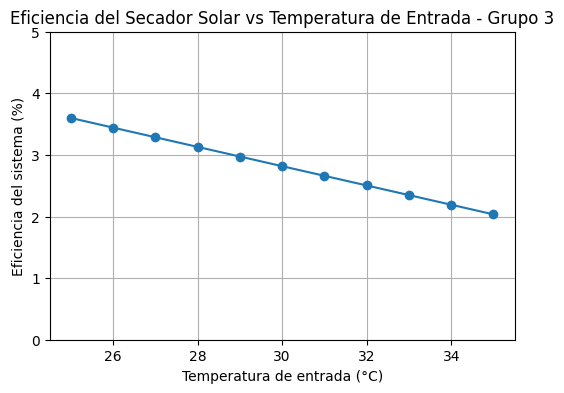

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos base del Grupo 3
Ac = 3.0           # Área (m²)
mdot = 0.030       # Flujo másico (kg/s)
To = 48            # Temp. de salida (°C)
I = 820            # Irradiancia (W/m²)
t_secado = 6 * 3600 # Tiempo de secado (6 horas)

# Rango de temperaturas de entrada (°C)
Ti_values = np.linspace(25, 35, 11)

# Cálculo estimado de eficiencia ηs (relación con ΔT / máximo ΔT)
eta_s_values = (To - Ti_values) / (To - Ti_values[0]) * 0.036  # Basado en la eficiencia inicial (3.6%)

# Gráfica
plt.figure(figsize=(6,4))
plt.plot(Ti_values, eta_s_values * 100, marker='o')
plt.xlabel('Temperatura de entrada (°C)')
plt.ylabel('Eficiencia del sistema (%)')
plt.title('Eficiencia del Secador Solar vs Temperatura de Entrada - Grupo 3')
plt.grid(True)
plt.ylim(0, 5)
plt.show()

<a name="prompts"></a>
7. **Prompts sugeridos**


*   Explícame cómo calcular la eficiencia del colector solar según el Apéndice 7 del libro Solar Dryers.
*   Genera un código en Python para determinar la eficiencia térmica de un colector solar plano.
*   Crea un gráfico en Matplotlib que relacione la temperatura de entrada con la eficiencia del sistema.
*   Ayúdame a interpretar los resultados del balance energético en un secador solar

In [ ]:
# Genera un código en Python para determinar la eficiencia térmica de un colector solar plano.

# Usando los datos base definidos previamente:
# A = 3.0            # Área del colector, m2
# m_dot = 0.030      # Flujo másico de aire, kg/s
# Ti = 33.0          # Temperatura de entrada (al colector o cámara), °C
# To = 48.0          # Temperatura de salida (del colector), °C
# I = 820.0          # Irradiancia (intensidad solar), W/m2

cp = 1005  # Calor específico del aire, J/kg·°C

# Calcular la energía útil ganada por el aire
Qu = m_dot * cp * (To - Ti)  # W

# Calcular la energía solar incidente total
Q_incidente = A * I  # W

# Calcular la eficiencia térmica del colector
eta_c = Qu / Q_incidente

print(f"Energía útil recolectada (Qu): {Qu:.2f} W")
print(f"Energía solar incidente (Q_incidente): {Q_incidente:.2f} W")
print(f"Eficiencia térmica del colector (eta_c): {eta_c:.4f} ({eta_c*100:.2f} %)")

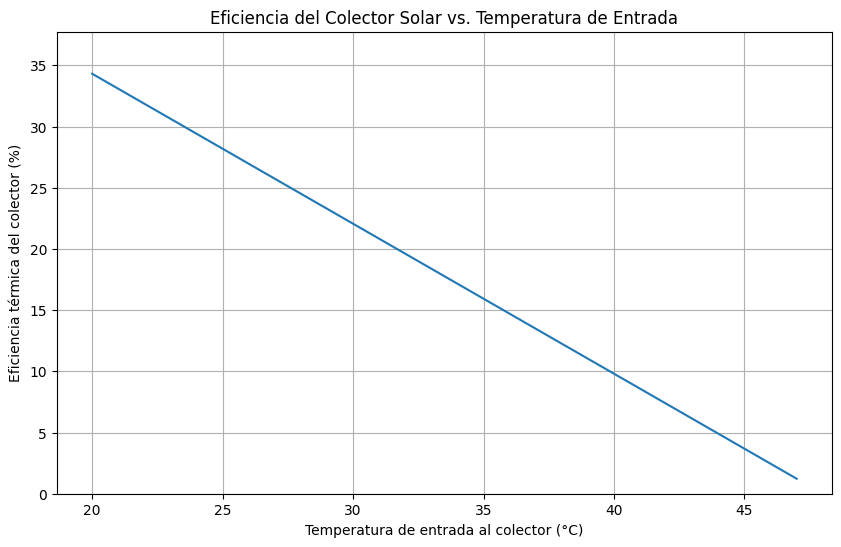

Este gráfico muestra cómo la eficiencia térmica del colector disminuye a medida que aumenta la temperatura del aire de entrada, asumiendo que la temperatura de salida y otros parámetros se mantienen constantes. Esto ocurre porque la diferencia de temperatura (To - Ti) se reduce, disminuyendo la energía útil recolectada.


In [ ]:
# Crea un gráfico en Matplotlib que relacione la temperatura de entrada con la eficiencia del sistema.
# NOTA: Para este gráfico, asumiremos que otros parámetros (m_dot, To, I, A, cp) se mantienen constantes
# y exploraremos cómo la eficiencia del colector varía con la temperatura de entrada (Ti).

import numpy as np
import matplotlib.pyplot as plt

# Parámetros fijos (usando los valores base)
A = 3.0      # Área del colector, m2
m_dot = 0.030  # Flujo másico de aire, kg/s
To = 48.0    # Temperatura de salida (constante para este ejemplo)
I = 820.0    # Irradiancia (intensidad solar), W/m2
cp = 1005    # Calor específico del aire, J/kg·°C

# Rango de temperaturas de entrada a explorar
Ti_range = np.linspace(20, To - 1, 50) # Evitar Ti >= To

# Calcular la eficiencia del colector para cada temperatura de entrada
eta_c_values = []
for Ti in Ti_range:
    Qu = m_dot * cp * (To - Ti)
    Q_incidente = A * I
    eta_c = Qu / Q_incidente
    eta_c_values.append(eta_c)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(Ti_range, np.array(eta_c_values) * 100)
plt.xlabel('Temperatura de entrada al colector (°C)')
plt.ylabel('Eficiencia térmica del colector (%)')
plt.title('Eficiencia del Colector Solar vs. Temperatura de Entrada')
plt.grid(True)
plt.ylim(0, max(np.array(eta_c_values) * 100) * 1.1) # Ajustar límite y
plt.show()